## **Algerian fire prediction project**

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df = pd.read_csv("Algerian_forest_fires_dataset.csv")

In [152]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [154]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [155]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [156]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [157]:
df[df["Classes  "].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [158]:
df[120:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
128,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
129,5,6,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire


In [159]:
df = df.drop([122,123,124]).reset_index()

In [160]:
df.isnull().sum()

index          0
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [161]:
df[120:125]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


In [162]:
new_df = df.drop(["index","day","month","year"],axis=1)
new_df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
239,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
243,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [163]:
new_df.dropna(inplace=True)

In [164]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  243 non-null    object
 1    RH          243 non-null    object
 2    Ws          243 non-null    object
 3   Rain         243 non-null    object
 4   FFMC         243 non-null    object
 5   DMC          243 non-null    object
 6   DC           243 non-null    object
 7   ISI          243 non-null    object
 8   BUI          243 non-null    object
 9   FWI          243 non-null    object
 10  Classes      243 non-null    object
dtypes: object(11)
memory usage: 22.8+ KB


In [165]:
new_df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,243,243,243,243,243,243,243,243,243,243,243
unique,19,62,18,39,173,165,197,106,173,125,8
top,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,29,10,43,133,7,5,5,8,5,12,131


In [166]:
col_name = new_df.columns
col_name

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes  '],
      dtype='object')

In [167]:
def replace_name(data):
    newdata = []
    for i in range(len(data)):
        temp = data[i].strip()
        newdata.append(temp)

    return np.array(newdata)

new_data = replace_name(col_name)

In [168]:
new_df.columns = new_data

In [169]:
new_df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [170]:
new_df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes'],
      dtype='object')

## **EDA**

In [196]:
data = new_df.copy()
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [197]:
data["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [198]:
# categorize classes columns

data["Classes"] = np.where(data["Classes"].str.contains("not fire"),0,1)

In [199]:
data["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7d4633ed19a0>,
 [Text(-0.21895639684834634, 1.0779879852202388, ''),
  Text(0.21895649777686463, -1.0779879647200568, '')],
 [Text(-0.1194307619172798, 0.5879934464837665, '56.38%'),
  Text(0.11943081696919887, -0.587993435301849, '43.62%')])

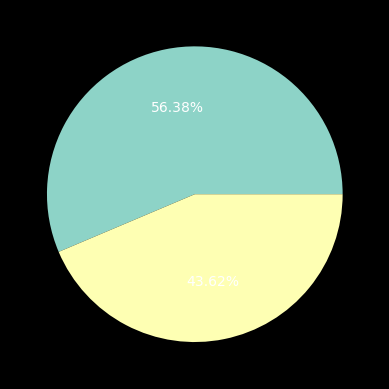

In [200]:
classlabel = ["not_fire","fire"]


plt.pie(data["Classes"].value_counts(normalize=True)*100,autopct="%1.2f%%")

In [201]:

data.groupby("Classes").sum()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Classes,,,,,,,,,,
0,2929262527252827302829303131303132292732333532...,5761828977887984788089897855806747687576786468...,1813221316131221201713161416161713191920171814...,01.313.12.500.201.20.53.10.70.60.30.10.40.10.3...,65.764.447.128.664.852.973.2505949.436.137.356...,3.44.12.51.337.99.56.74.631.71.11.94.53.4718.4...,7.67.67.16.914.238.846.3177.87.47.67.881627.13...,1.310.301.20.41.30.510.4000.72.50.92.42.21.10....,3.43.92.71.73.910.512.66.74.432.21.62.45.35.19...,0.50.40.100.50.30.90.20.40.1000.21.40.42.33.90...
1,3133303126303232313134323333323329313533333136...,6754736581786266646453555066636870685965706553...,1413151419141817151818141414141914141715171819...,0000000.10000000000000.1000000000000000000.30....,82.688.286.684.5848181.485.986.786.88989.188.7...,5.89.912.112.513.86.38.211.214.217.821.625.522...,22.230.538.354.361.431.647.755.863.871.880.388...,3.16.45.644.82.63.35.65.76.79.27.67.24.85.663....,710.913.515.817.78.411.514.918.321.625.829.728...,2.57.27.15.67.12.23.87.58.410.61513.912.94.96....


In [202]:
data.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216


<Axes: >

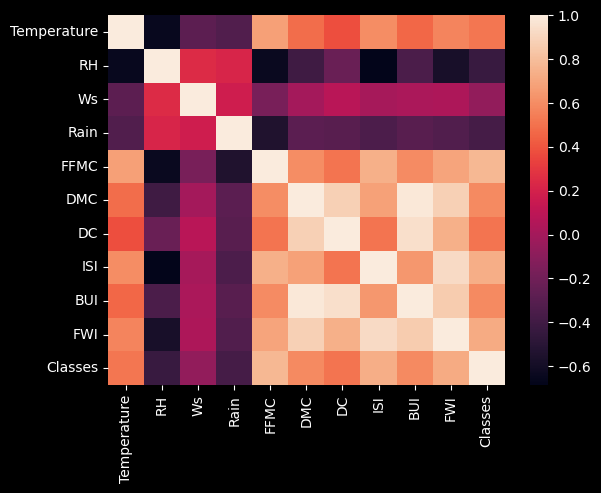

In [203]:
sns.heatmap(data.corr())

<Axes: ylabel='FWI'>

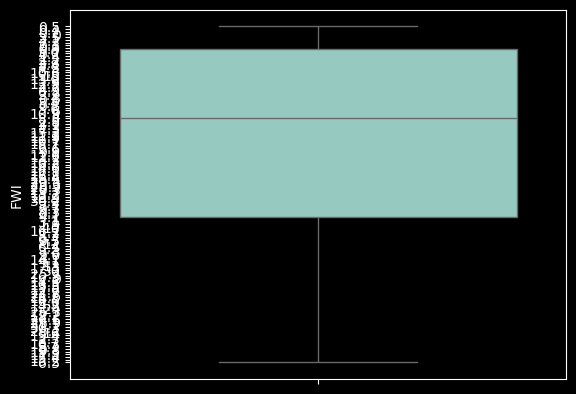

In [204]:
sns.boxplot(data["FWI"])

In [205]:
# monthly fire analysis
new_df["Classes"]

0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
239         fire   
240     not fire   
241     not fire   
242     not fire   
243    not fire    
Name: Classes, Length: 243, dtype: object

In [206]:
# temp = df[df["Classes  "].str.contains("fire")].groupby("month")

In [207]:
### Model Building

In [208]:
# feature selection

X = data.drop("FWI",axis=1)
y = data["FWI"]

In [209]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  243 non-null    object
 1   RH           243 non-null    object
 2   Ws           243 non-null    object
 3   Rain         243 non-null    object
 4   FFMC         243 non-null    object
 5   DMC          243 non-null    object
 6   DC           243 non-null    object
 7   ISI          243 non-null    object
 8   BUI          243 non-null    object
 9   Classes      243 non-null    int64 
dtypes: int64(1), object(9)
memory usage: 20.9+ KB


In [210]:
y

0      0.5
1      0.4
2      0.1
3        0
4      0.5
      ... 
239    6.5
240      0
241    0.2
242    0.7
243    0.5
Name: FWI, Length: 243, dtype: object

In [211]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=42)

In [212]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((182, 10), (61, 10), (182,), (61,))

In [213]:
# cheak for multicolinearity
cor = x_train.corr()
cor



,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000


<Axes: >

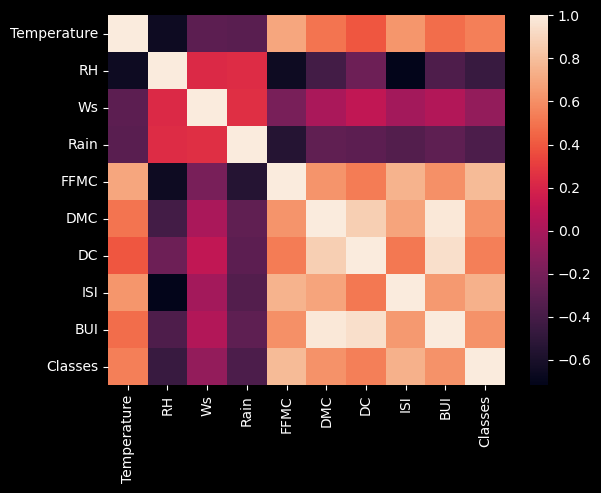

In [214]:
sns.heatmap(cor)

In [215]:
def correlation(dataset,threshold):
    col_cor = set()
    cor_mat = dataset.corr()


    for i in range(len(cor_mat.columns)):
        for j in range(i):
            if abs(cor_mat.iloc[i,j]>threshold):
                colname = cor_mat.columns[i]
                col_cor.add(colname)
    return col_cor




In [216]:
highly_corr_feature = correlation(x_train,0.85)
highly_corr_feature

{'BUI', 'DC'}

In [217]:
x_train.drop(highly_corr_feature,axis=1,inplace=True)
x_test.drop(highly_corr_feature,axis=1,inplace=True)

In [218]:
x_train.shape,x_test.shape

((182, 8), (61, 8))

In [226]:
# scaled the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

<Axes: >

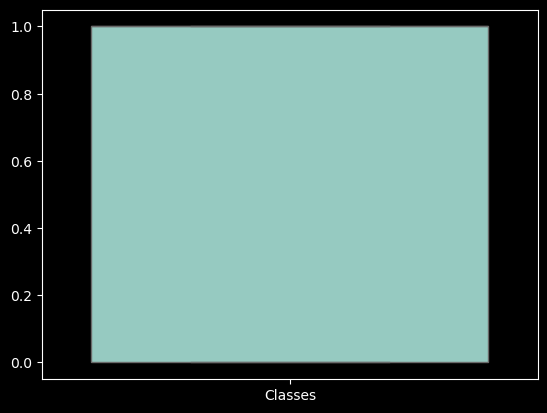

In [227]:
sns.boxplot(data=X)

<Axes: >

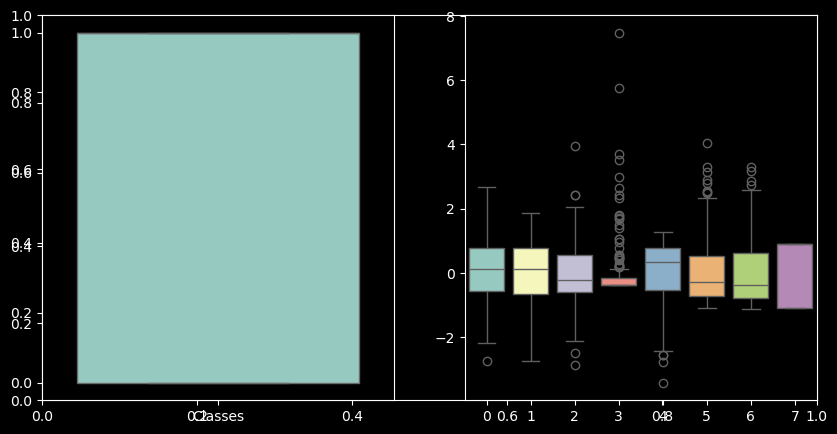

In [228]:
# somthing is wrong their

plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)

In [229]:
# model building
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression


r2 score 0.9818991727411215
mae 0.5842707645701569


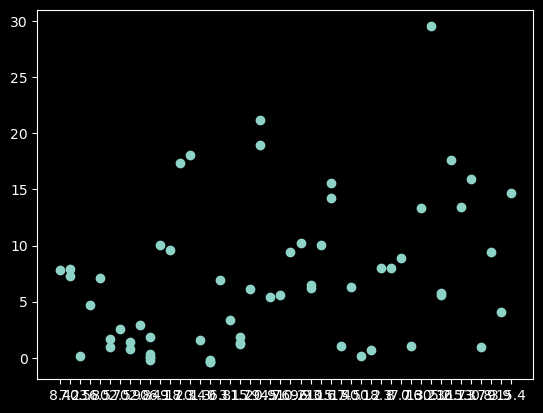

In [230]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("r2 score",r2_score(y_test,y_pred))
print("mae",mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)

r2 score 0.9818991727411215
mae 0.5842707645701555


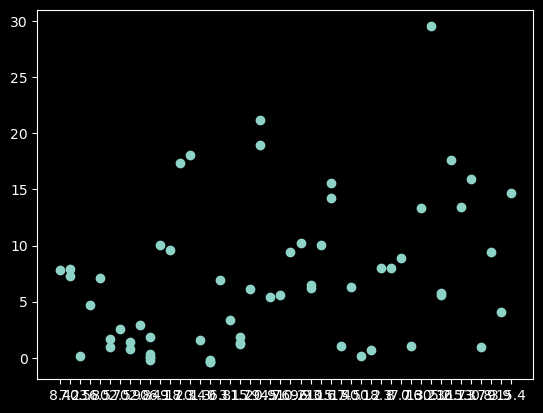

In [225]:
model = LinearRegression()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
print("r2 score",r2_score(y_test,y_pred))
print("mae",mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)